## MORGAN and FINGERPRINT of two datasets

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem


### Morgan Fingerprint of first dataset

In [25]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update.csv')

# Create an empty list to store fingerprints
fingerprints = []

# Calculate Morgan fingerprint for each SMILES notation
for index, row in df.iterrows():
    smiles = row['SMILES']
    
    # Skip rows with missing or invalid SMILES strings (e.g., None)
    if not isinstance(smiles, str):
        fingerprints.append(None)
        continue
    
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if MolFromSmiles successfully created a valid molecule object
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        fingerprints.append(fp.ToBitString())
    else:
        fingerprints.append(None)

# Add 'Fingerprint' column to the DataFrame and assign calculated fingerprints
df['Fingerprint'] = fingerprints

# Save updated DataFrame back to CSV file (overwrite existing file)
df.to_csv('OR_AGONIST_update2.csv', index=False)

print("Morgan fingerprint calculation completed!")
df.head(61)

Morgan fingerprint calculation completed!


,RECEPTOR,AGONIST,SMILES,Fingerprint
0,OR51E1,butyl butyryl lactate,CCCCOC(=O)C(C)OC(=O)CCC,0100000000000100000000000000000000000000000000...
1,NaN,valeric acid,CCCCC(=O)O,0000000000000000000000000000000000000000000000...
2,NaN,4-Methylvaleric acid,CC(C)CCC(=O)O,0100000000000000000000000000000000000000000000...
3,NaN,5-Norbornene-2-carboxylic acid,C1C2CC(C1C=C2)C(=O)O,0000000000000000000000000000000000000000000000...
4,NaN,2-Methylvaleric acid,CCCC(C)C(=O)O,0100000000000000000000000000000000000000000000...
...,...,...,...,...
56,NaN,propanoic acid,CCC(=O)O,0010000000000000000000000000000000000000000000...
57,NaN,19-hydroxyandrostenedione,CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34CO,0000000100000000000000000000000000000000000000...
58,NaN,(E)-beta-Ionone,CC1=C(C(CCC1)(C)C)C=CC(=O)C,0000000000000000000000000000000100000000000000...
59,NaN,(E)-alpha-Ionone,CC1=CCCC(C1C=CC(=O)C)(C)C,0000000000000000000100000000000100000000000000...


In [12]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/home/ritesh/Desktop/MOLECULES/morgan/Smiles.csv')

# Create an empty list to store fingerprints
fingerprints = []

# Calculate Morgan fingerprint for each SMILES notation
for index, row in df.iterrows():
    smiles = row['SMILES']
    
    # Skip rows with missing or invalid SMILES strings (e.g., None)
    if not isinstance(smiles, str):
        fingerprints.append(None)
        continue
    
    mol = Chem.MolFromSmiles(smiles)
    
    # Check if MolFromSmiles successfully created a valid molecule object
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        fingerprints.append(fp.ToBitString())
    else:
        fingerprints.append(None)

# Add 'Fingerprint' column to the DataFrame and assign calculated fingerprints
df['Fingerprint'] = fingerprints

# Save updated DataFrame back to CSV file (overwrite existing file)
df.to_csv('smilesfpm.csv', index=False)

print("Morgan fingerprint calculation completed!")
df.head(277)

Morgan fingerprint calculation completed!


,SMILES,Fingerprint
0,CSCCC=O,0000000000010000000000000000000000000000000000...
1,CCC(C)C=O,0100000000000000000000000000000000000000000000...
2,CC(=O)C(C)=O,0000000000000000000000000000000000000000000000...
3,CCCCC/C=C/C=C/C=O,0000000000000000000000000000000000000000000000...
4,CC1OC(=C(O)C1=O)C,0000000000000000000000000000000000000000000000...
...,...,...
218,CCCSSCCC,0000000000000000000000000000000000000000000000...
219,CCOC(=O)CCC(C)C,0100000000000000000000000000000000000000000000...
220,CCOC(=O)CCSC,0000000000010000000000000000000000000000000000...
221,CCCC[C@@H](CC)CCC([O-])=O,0100000000000000000000000000000000000000000000...


## Various distance metrics for similarity calculation using the fingerprints

In [26]:
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

    # Print unique SMILES in df1 and df2
    print("Unique SMILES in df1:", len(df1['SMILES'].unique()))
    print("Unique SMILES in df2:", len(df2['SMILES'].unique()))

    # Drop common SMILES from second dataset if any
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    print("Common SMILES:", common_smiles)

    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

Unique SMILES in df1: 57
Unique SMILES in df2: 220
Common SMILES: {'CCC=O', 'CCCCCCCCC=O', 'CCCCCCCC=O', 'CCCCCCCC(=O)OCC', 'COC1=C(C=C(C=C1)CC=C)OC', 'C1=CC=C2C(=C1)C=CC(=O)O2', 'CCCCCCO', 'CSSC', 'COC1=CC=CC=C1O', 'CCCCCC(=O)C=C'}


In [27]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances

def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any 
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)
    print("Common SMILES:", common_smiles)
	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]

	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])

    print("Fingerprints1 shape:", fingerprints1_np.shape)
    print("Fingerprints2 shape:", fingerprints2_np.shape)
    print("df2_filtered shape:", df2_filtered.shape)
    print("Number of unique SMILES in df2_filtered:", len(df2_filtered['SMILES'].unique()))
    print("df2 shape:", df2.shape)
    print("Number of unique SMILES in df2:", len(df2['SMILES'].unique()))
	# Calculate Hamming distance matrix between two datasets using bitwise similarity measure
    hamming_dist_matrix=pairwise_distances(fingerprints1_np,fingerprints2_np, metric='hamming')
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Calculate other distances (cosine distance, hyperbolic distance, and euclidean distance)
    cosine_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np, metric='cosine')

    euclidean_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np , metric='euclidean')

	# Create a dictionary to store similarity scores with SMILES strings for each distance metric 
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={
	        'Hamming Distance': hamming_dist_matrix[i].min(),
	        'Cosine Distance': cosine_dist_matrix[i].min(),
			'Euclidean Distance': euclidean_dist_matrix[i].min(),
			'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Hamming Distance', 'Cosine Distance',
                                                     'Euclidean Distance', 'Tanimoto Distance'])

    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:20], 'SMILES']
    # Print the most similar SMILES and their corresponding distance values from dataset 2
    most_similar_distances = sorted_similarity_df.iloc[:20]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(most_similar_distances)

    return most_similar_smiles, most_similar_distances

# Example usage:
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update2.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/smilesfpm.csv"

most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Common SMILES: {'CCC=O', 'CCCCCCCCC=O', 'CCCCCCCC=O', 'CCCCCCCC(=O)OCC', 'COC1=C(C=C(C=C1)CC=C)OC', 'C1=CC=C2C(=C1)C=CC(=O)O2', 'CCCCCCO', 'CSSC', 'COC1=CC=CC=C1O', 'CCCCCC(=O)C=C'}
Fingerprints1 shape: (61, 2048)
Fingerprints2 shape: (212, 2048)
df2_filtered shape: (212, 2)
Number of unique SMILES in df2_filtered: 210
df2 shape: (223, 2)
Number of unique SMILES in df2: 220
Most similar SMILES:
8                         CC=O
11       COC1=C(C=CC(=C1)C=O)O
17                 CCCC(=O)OCC
18                 CC\C=C/CC=O
22           C1=CC=C(C=C1)CC=O
23               CCOC(=O)C(C)C
25           CCC1=NC=C(N=C1C)C
31           CC/C=C/CC\C=C\C=O
33          CC(C)C1=NC=CN=C1OC
36                         CSC
37       COC1=C(C=CC(=C1)C=C)O
38                          CS
40           CCCCCC1CCCC(=O)O1
42        CCCCC[C@H]1CCC(=O)O1
46                         CCO
56    CCCC[C@H]1OC(=O)C[C@H]1C
58                 CCCCCC(O)=O
1                    CCC(C)C=O
12              CC(=O)C1=NCCC1
41           

## similarity b/w two more datasets

### most similar molecules b/w multiple datasets 


In [28]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances


In [29]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances

def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any 
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]

	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])

	# Calculate Hamming distance matrix between two datasets using bitwise similarity measure
    hamming_dist_matrix=pairwise_distances(fingerprints1_np,fingerprints2_np, metric='hamming')
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Calculate other distances (cosine distance, hyperbolic distance, and euclidean distance)
    cosine_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np, metric='cosine')
    euclidean_dist_matrix = pairwise_distances(fingerprints1_np, fingerprints2_np , metric='euclidean')
	# Create a dictionary to store similarity scores with SMILES strings for each distance metric 
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={
	        'Hamming Distance': hamming_dist_matrix[i].min(),
	        'Cosine Distance': cosine_dist_matrix[i].min(),
			'Euclidean Distance': euclidean_dist_matrix[i].min(),
			'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Hamming Distance', 'Cosine Distance',
                                                     'Euclidean Distance', 'Tanimoto Distance'])
    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:10], 'SMILES']
    # Print the most similar SMILES and their corresponding distance values from dataset 2
    most_similar_distances = sorted_similarity_df.iloc[:10]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(most_similar_distances.round(20))

    return most_similar_smiles, most_similar_distances


# Example usage:
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update2.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/smilesfpm.csv"


most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Most similar SMILES:
8                      CC=O
11    COC1=C(C=CC(=C1)C=O)O
17              CCCC(=O)OCC
18              CC\C=C/CC=O
22        C1=CC=C(C=C1)CC=O
23            CCOC(=O)C(C)C
25        CCC1=NC=C(N=C1C)C
31        CC/C=C/CC\C=C\C=O
33       CC(C)C1=NC=CN=C1OC
36                      CSC
Name: SMILES, dtype: object

Distance Values:
    Hamming Distance  Cosine Distance  Euclidean Distance  Tanimoto Distance
8                0.0              0.0                 0.0                0.0
11               0.0              0.0                 0.0                0.0
17               0.0              0.0                 0.0                0.0
18               0.0              0.0                 0.0                0.0
22               0.0              0.0                 0.0                0.0
23               0.0              0.0                 0.0                0.0
25               0.0              0.0                 0.0                0.0
31               0.0              0.0

## string mapping to check for common smiles

In [30]:
import pandas as pd
def mapping(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    dataset1 = pd.read_csv(file1_path)
    dataset2 = pd.read_csv(file2_path)
dataset1 = pd.read_csv(file1_path)
dataset2 = pd.read_csv(file2_path)

# Perform string mapping to find common SMILES between datasets
common_smiles = set(dataset1['SMILES']).intersection(set(dataset2['SMILES']))

# Filter rows from both datasets based on common SMILES
filtered_dataset1 = dataset1[dataset1['SMILES'].isin(common_smiles)]
filtered_dataset2 = dataset2[dataset2['SMILES'].isin(common_smiles)]

# Merge filtered datasets on common SMILES
merged_dataset = pd.merge(filtered_dataset1, filtered_dataset2, on='SMILES', how='inner')

# Save merged dataset to a new CSV file
merged_dataset.to_csv('mapping.csv', index=False)
print(merged_dataset)
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update2.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/smilesfpm.csv"

   RECEPTOR             AGONIST                    SMILES  \
0       NaN            Coumarin  C1=CC=C2C(=C1)C=CC(=O)O2   
1       NaN             octanal                CCCCCCCC=O   
2       NaN      Methyl eugenol   COC1=C(C=C(C=C1)CC=C)OC   
3       NaN      Methyl eugenol   COC1=C(C=C(C=C1)CC=C)OC   
4       NaN     Ethyl caprylate           CCCCCCCC(=O)OCC   
5       NaN           1-Hexanol                   CCCCCCO   
6       NaN             nonanal               CCCCCCCCC=O   
7       NaN       1-octen-3-one             CCCCCC(=O)C=C   
8       NaN            Guaiacol            COC1=CC=CC=C1O   
9       NaN  Dimethyl disulfide                      CSSC   
10      NaN            Propanal                     CCC=O   

                                        Fingerprint_x  \
0   0000000000000000000000000000000000000000000000...   
1   0000000000000000000000000000000000000000000000...   
2   0000000000000000000000000000000000000000000000...   
3   00000000000000000000000000000000000

In [31]:
import pandas as pd
def mapping(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    dataset1 = pd.read_csv(file1_path)
    dataset2 = pd.read_csv(file2_path)
dataset1 = pd.read_csv(file1_path)
dataset2 = pd.read_csv(file2_path)

# Perform string mapping to find common SMILES between datasets
common_smiles = set(dataset1['SMILES']).intersection(set(dataset2['SMILES']))

# Filter rows from both datasets based on common SMILES
filtered_dataset1 = dataset1[dataset1['SMILES'].isin(common_smiles)]
filtered_dataset2 = dataset2[dataset2['SMILES'].isin(common_smiles)]

# Merge filtered datasets on common SMILES
merged_dataset = pd.merge(filtered_dataset1, filtered_dataset2, on='SMILES', how='inner')
print(merged_dataset)
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update2.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/smilesfpm.csv"

   RECEPTOR             AGONIST                    SMILES  \
0       NaN            Coumarin  C1=CC=C2C(=C1)C=CC(=O)O2   
1       NaN             octanal                CCCCCCCC=O   
2       NaN      Methyl eugenol   COC1=C(C=C(C=C1)CC=C)OC   
3       NaN      Methyl eugenol   COC1=C(C=C(C=C1)CC=C)OC   
4       NaN     Ethyl caprylate           CCCCCCCC(=O)OCC   
5       NaN           1-Hexanol                   CCCCCCO   
6       NaN             nonanal               CCCCCCCCC=O   
7       NaN       1-octen-3-one             CCCCCC(=O)C=C   
8       NaN            Guaiacol            COC1=CC=CC=C1O   
9       NaN  Dimethyl disulfide                      CSSC   
10      NaN            Propanal                     CCC=O   

                                        Fingerprint_x  \
0   0000000000000000000000000000000000000000000000...   
1   0000000000000000000000000000000000000000000000...   
2   0000000000000000000000000000000000000000000000...   
3   00000000000000000000000000000000000

## most similar smiles only using tanimoto distance

### saving 10 most similar SMILES to the initial dataset

In [32]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from sklearn.metrics.pairwise import pairwise_distances

def tanimoto_distance(u, v):
    intersection = np.bitwise_and(u, v)
    union = np.bitwise_or(u, v)

    return 1 - (np.count_nonzero(intersection) / np.count_nonzero(union))

def find_most_similar_molecules(file1_path: str, file2_path: str):
    # Load the fingerprint files into dataframes
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)

	# Drop common SMILES from second dataset if any 
    common_smiles = set(df1['SMILES']).intersection(set(df2['SMILES']))
    df2_filtered = df2[~df2['SMILES'].isin(common_smiles)].reset_index(drop=True)

	# Convert binary string fingerprints to RDKit ExplicitBitVect objects for both datasets
    fingerprints1 = [DataStructs.CreateFromBitString(fp) for fp in df1['Fingerprint']]
    fingerprints2 = [DataStructs.CreateFromBitString(fp) for fp in df2_filtered['Fingerprint']]


	# Convert fingerprint lists to numpy arrays
    fingerprints1_np = np.array([np.array(list(fp)) for fp in fingerprints1])
    fingerprints2_np = np.array([np.array(list(fp)) for fp in fingerprints2])
	# Calculate Tanimoto distance matrix using the custom function
    tanimoto_dist_matrix = np.zeros((len(df1), len(df2_filtered)))
    for i in range(len(df1)):
	    for j in range(len(df2_filtered)):
	        tanimoto_dist_matrix[i][j] = tanimoto_distance(fingerprints1_np[i], fingerprints2_np[j])

	# Create a dictionary to store similarity scores with SMILES strings for each distance metric 
    similarity_scores_dict = {}

    for i in range(len(df1)):
	    similarity_scores_dict[i] ={'Tanimoto Distance': tanimoto_dist_matrix[i].min()
	    }

    # Convert the dictionary to a dataframe
    similarity_df = pd.DataFrame(similarity_scores_dict).transpose()

    # Sort the dataframe based on all distances in ascending order
    sorted_similarity_df = similarity_df.sort_values(['Tanimoto Distance'])

    # Print the most similar SMILES from dataset 2
    most_similar_smiles = df2_filtered.loc[sorted_similarity_df.index[:10], 'SMILES']
    most_similar_distances = sorted_similarity_df.iloc[:100]

    print("Most similar SMILES:")
    print(most_similar_smiles)
    print("\nDistance Values:")
    print(most_similar_distances.round(100))

    return most_similar_smiles, most_similar_distances

# Example usage:
file1_path = "/home/ritesh/Desktop/MOLECULES/morgan/OR_AGONIST_update2.csv"
file2_path = "/home/ritesh/Desktop/MOLECULES/morgan/smilesfpm.csv"

most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

Most similar SMILES:
1                 CCC(C)C=O
12           CC(=O)C1=NCCC1
11    COC1=C(C=CC(=C1)C=O)O
8                      CC=O
23            CCOC(=O)C(C)C
22        C1=CC=C(C=C1)CC=O
18              CC\C=C/CC=O
17              CCCC(=O)OCC
25        CCC1=NC=C(N=C1C)C
31        CC/C=C/CC\C=C\C=O
Name: SMILES, dtype: object

Distance Values:
    Tanimoto Distance
1            0.000000
12           0.000000
11           0.000000
8            0.000000
23           0.000000
..                ...
54           0.772727
49           0.787879
57           0.789474
3            0.833333
24           0.857143

[61 rows x 1 columns]


In [33]:
import pandas as pd

def create_similarity_csv(file1_path: str, file2_path: str, output_file: str):
    # Find the most similar molecules
    most_similar_molecules = find_most_similar_molecules(file1_path, file2_path)

    # Get the SMILES from both datasets
    smiles_dataset1 = pd.read_csv(file1_path)['SMILES']
    
    # Combine the most similar SMILES with their corresponding SMILES from dataset 1
    combined_smiles = pd.concat([smiles_dataset1, most_similar_molecules[0]], axis=0)
    
	# Save to CSV file
    combined_smiles.to_csv(output_file, index=False)

# Example usage:
output_file = "/home/ritesh/Desktop/MOLECULES/morgan/or_agonist_update_2.csv"
create_similarity_csv(file1_path, file2_path, output_file)

Most similar SMILES:
1                 CCC(C)C=O
12           CC(=O)C1=NCCC1
11    COC1=C(C=CC(=C1)C=O)O
8                      CC=O
23            CCOC(=O)C(C)C
22        C1=CC=C(C=C1)CC=O
18              CC\C=C/CC=O
17              CCCC(=O)OCC
25        CCC1=NC=C(N=C1C)C
31        CC/C=C/CC\C=C\C=O
Name: SMILES, dtype: object

Distance Values:
    Tanimoto Distance
1            0.000000
12           0.000000
11           0.000000
8            0.000000
23           0.000000
..                ...
54           0.772727
49           0.787879
57           0.789474
3            0.833333
24           0.857143

[61 rows x 1 columns]


# DESCRIPTOR CALCULATION -physicochemical features

In [34]:
!pip install mordred
!pip install umap

In [35]:
import os,re,sys,pickle,datetime,time,random,itertools
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from scipy import stats
import math
from tqdm import tqdm
import seaborn as sns
import umap
from multiprocessing import freeze_support
import mordred
from mordred import Calculator, descriptors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,NMF
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
import rdkit
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MolFromSmiles, PandasTools, Descriptors, Draw, PropertyMol, rdmolfiles, rdFMCS
from rdkit import RDConfig
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import MolsToGridImage, IPythonConsole, rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions, Font
DrawingOptions.bondLineWidth=1.8
DrawingOptions.includeAtomNumbers=False
size = (150, 150)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
randomstate = 42

In [36]:
filepath1 = "/home/ritesh/Desktop/MOLECULES/morgan/or_agonist_update_2.csv"
mols = pd.read_csv(filepath1)
mols

,SMILES
0,CCCCOC(=O)C(C)OC(=O)CCC
1,CCCCC(=O)O
2,CC(C)CCC(=O)O
3,C1C2CC(C1C=C2)C(=O)O
4,CCCC(C)C(=O)O
...,...
66,C1=CC=C(C=C1)CC=O
67,CC\C=C/CC=O
68,CCCC(=O)OCC
69,CCC1=NC=C(N=C1C)C


In [37]:
mols = mols.drop_duplicates(subset=['SMILES'])
mols

,SMILES
0,CCCCOC(=O)C(C)OC(=O)CCC
1,CCCCC(=O)O
2,CC(C)CCC(=O)O
3,C1C2CC(C1C=C2)C(=O)O
4,CCCC(C)C(=O)O
...,...
66,C1=CC=C(C=C1)CC=O
67,CC\C=C/CC=O
68,CCCC(=O)OCC
69,CCC1=NC=C(N=C1C)C


In [38]:
mols['rdmol'] = mols['SMILES'].map(lambda x: Chem.MolFromSmiles(x))
mols['inchi'] = mols['rdmol'].map(Chem.MolToInchi)
mols = mols.drop_duplicates(subset="inchi")

print('Number of SMILES after duplicates removed:',len(mols))

mols

Number of SMILES after duplicates removed: 67


[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Proton(s) added/removed

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Charges were rearranged

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Omitted undefined stereo

[18:24:59] WARNING: Proton(s) added/removed

[18:24:59] WARNING: Omitted undefined stereo



,SMILES,rdmol,inchi
0,CCCCOC(=O)C(C)OC(=O)CCC,<rdkit.Chem.rdchem.Mol object at 0x7f915d119d90>,InChI=1S/C11H20O4/c1-4-6-8-14-11(13)9(3)15-10(...
1,CCCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f915d1198c0>,"InChI=1S/C5H10O2/c1-2-3-4-5(6)7/h2-4H2,1H3,(H,..."
2,CC(C)CCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f915d11a6c0>,"InChI=1S/C6H12O2/c1-5(2)3-4-6(7)8/h5H,3-4H2,1-..."
3,C1C2CC(C1C=C2)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f915d11a730>,InChI=1S/C8H10O2/c9-8(10)7-4-5-1-2-6(7)3-5/h1-...
4,CCCC(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f915d11a7a0>,"InChI=1S/C6H12O2/c1-3-4-5(2)6(7)8/h5H,3-4H2,1-..."
...,...,...,...
66,C1=CC=C(C=C1)CC=O,<rdkit.Chem.rdchem.Mol object at 0x7f915d11ba00>,"InChI=1S/C8H8O/c9-7-6-8-4-2-1-3-5-8/h1-5,7H,6H2"
67,CC\C=C/CC=O,<rdkit.Chem.rdchem.Mol object at 0x7f915d11ba70>,"InChI=1S/C6H10O/c1-2-3-4-5-6-7/h3-4,6H,2,5H2,1..."
68,CCCC(=O)OCC,<rdkit.Chem.rdchem.Mol object at 0x7f915d11bae0>,"InChI=1S/C6H12O2/c1-3-5-6(7)8-4-2/h3-5H2,1-2H3"
69,CCC1=NC=C(N=C1C)C,<rdkit.Chem.rdchem.Mol object at 0x7f915d11bb50>,"InChI=1S/C8H12N2/c1-4-8-7(3)10-6(2)5-9-8/h5H,4..."


In [39]:
def embed(mol):
    mol_with_H = Chem.AddHs(mol)
    Chem.AllChem.EmbedMolecule(mol_with_H)
    Chem.AllChem.MMFFOptimizeMolecule(mol_with_H)
    return mol_with_H

mols['rdmol_optimized'] = mols.rdmol.map(embed)

mols

,SMILES,rdmol,inchi,rdmol_optimized
0,CCCCOC(=O)C(C)OC(=O)CCC,<rdkit.Chem.rdchem.Mol object at 0x7f915d119d90>,InChI=1S/C11H20O4/c1-4-6-8-14-11(13)9(3)15-10(...,<rdkit.Chem.rdchem.Mol object at 0x7f915ca68f90>
1,CCCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f915d1198c0>,"InChI=1S/C5H10O2/c1-2-3-4-5(6)7/h2-4H2,1H3,(H,...",<rdkit.Chem.rdchem.Mol object at 0x7f915d11aab0>
2,CC(C)CCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f915d11a6c0>,"InChI=1S/C6H12O2/c1-5(2)3-4-6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x7f915d1199a0>
3,C1C2CC(C1C=C2)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f915d11a730>,InChI=1S/C8H10O2/c9-8(10)7-4-5-1-2-6(7)3-5/h1-...,<rdkit.Chem.rdchem.Mol object at 0x7f915ca693f0>
4,CCCC(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7f915d11a7a0>,"InChI=1S/C6H12O2/c1-3-4-5(2)6(7)8/h5H,3-4H2,1-...",<rdkit.Chem.rdchem.Mol object at 0x7f915ca68dd0>
...,...,...,...,...
66,C1=CC=C(C=C1)CC=O,<rdkit.Chem.rdchem.Mol object at 0x7f915d11ba00>,"InChI=1S/C8H8O/c9-7-6-8-4-2-1-3-5-8/h1-5,7H,6H2",<rdkit.Chem.rdchem.Mol object at 0x7f915ca6adc0>
67,CC\C=C/CC=O,<rdkit.Chem.rdchem.Mol object at 0x7f915d11ba70>,"InChI=1S/C6H10O/c1-2-3-4-5-6-7/h3-4,6H,2,5H2,1...",<rdkit.Chem.rdchem.Mol object at 0x7f915ca6ae30>
68,CCCC(=O)OCC,<rdkit.Chem.rdchem.Mol object at 0x7f915d11bae0>,"InChI=1S/C6H12O2/c1-3-5-6(7)8-4-2/h3-5H2,1-2H3",<rdkit.Chem.rdchem.Mol object at 0x7f915ca6aea0>
69,CCC1=NC=C(N=C1C)C,<rdkit.Chem.rdchem.Mol object at 0x7f915d11bb50>,"InChI=1S/C8H12N2/c1-4-8-7(3)10-6(2)5-9-8/h5H,4...",<rdkit.Chem.rdchem.Mol object at 0x7f915ca6af10>


In [40]:
calc = Calculator(descriptors) # create calculator for all mordred descriptors (can also specify subtype)

df=calc.pandas(mols['rdmol_optimized'])
print(df)

100%|██████████| 67/67 [00:02<00:00, 32.45it/s]


                                                  ABC  \
0   module 'numpy' has no attribute 'float'.\n`np....   
1   module 'numpy' has no attribute 'float'.\n`np....   
2   module 'numpy' has no attribute 'float'.\n`np....   
3   module 'numpy' has no attribute 'float'.\n`np....   
4   module 'numpy' has no attribute 'float'.\n`np....   
..                                                ...   
66  module 'numpy' has no attribute 'float'.\n`np....   
67  module 'numpy' has no attribute 'float'.\n`np....   
68  module 'numpy' has no attribute 'float'.\n`np....   
69  module 'numpy' has no attribute 'float'.\n`np....   
70  module 'numpy' has no attribute 'float'.\n`np....   

                                                ABCGG  nAcid  nBase  \
0   module 'numpy' has no attribute 'float'.\n`np....      0      0   
1   module 'numpy' has no attribute 'float'.\n`np....      1      0   
2   module 'numpy' has no attribute 'float'.\n`np....      1      0   
3   module 'numpy' has no attri

In [41]:
#Replace mordred errors with NaNs then drop those descriptors/columns
df=df.applymap(lambda x: np.nan if type(x) in [mordred.error.Missing,mordred.error.Error] else x)
df=df.dropna(axis=1)
print(df.shape)

(67, 1227)


In [42]:
#Dropping columns that have a single value
non_zero_std = df.std() != 0
df = df [non_zero_std[non_zero_std].index]
print(df.shape)

(67, 984)


In [43]:
#Dropping highly correlated descriptors: If a pair of descriptors have a Pearson correlation coefficient (r) value greater than the threshold then one descriptor will be removed.
threshold=0.95
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df = df.drop(to_drop, axis=1)
print(df.shape)

(67, 409)


In [44]:
#saving the csv list
to_save=pd.concat([mols[['SMILES']], df], axis=1)
to_save

,SMILES,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VR1_A,nAromAtom,nAtom,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGT10,TopoShapeIndex,TSRW10,mZagreb1
0,CCCCOC(=O)C(C)OC(=O)CCC,0,0,17.250180,2.180397,1.150012,3.536894,86.757752,0,35,...,0.037333,0.025641,0.014842,0.007812,0.009877,0.005,0.474966,0.833333,44.789525,7.083333
1,CCCCC(=O)O,1,0,7.727407,1.931852,1.103915,2.752227,16.819499,0,17,...,0.053333,0.000000,0.000000,0.000000,0.000000,0.000,0.439907,0.666667,31.336140,3.861111
2,CC(C)CCC(=O)O,1,0,8.472136,2.000000,1.059017,2.899228,19.357315,0,20,...,0.080000,0.000000,0.000000,0.000000,0.000000,0.000,0.570476,0.666667,33.811160,4.722222
3,C1C2CC(C1C=C2)C(=O)O,1,0,12.828338,2.435498,1.282834,3.273564,37.401258,0,20,...,0.063016,0.062500,0.000000,0.000000,0.000000,0.000,0.484733,0.666667,56.287001,3.444444
4,CCCC(C)C(=O)O,1,0,8.647053,2.074313,1.080882,2.900310,21.298450,0,20,...,0.040000,0.000000,0.000000,0.000000,0.000000,0.000,0.518175,0.666667,34.323564,4.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,C1=CC=C(C=C1)CC=O,0,0,11.384646,2.148961,1.264961,3.080020,30.671730,6,17,...,0.030222,0.030093,0.040000,0.000000,0.000000,0.000,0.279308,1.000000,36.722228,2.861111
67,CC\C=C/CC=O,0,0,8.054679,1.847759,1.150668,2.739193,16.799928,0,17,...,0.026667,0.027778,0.000000,0.000000,0.000000,0.000,0.213472,1.000000,30.257210,3.250000
68,CCCC(=O)OCC,0,0,8.828427,2.000000,1.103553,2.888532,21.904303,0,20,...,0.016000,0.027778,0.000000,0.000000,0.000000,0.000,0.415802,1.000000,33.420942,4.111111
69,CCC1=NC=C(N=C1C)C,0,0,11.945822,2.267184,1.194582,3.197666,32.871605,6,22,...,0.064762,0.059028,0.000000,0.000000,0.000000,0.000,0.533645,1.000000,39.310842,4.333333


In [45]:
to_save.to_csv('mordred_descriptors_updated_agonist.csv', index = True)

In [46]:
df.head(72)

,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VR1_A,nAromAtom,nAtom,nBridgehead,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGT10,TopoShapeIndex,TSRW10,mZagreb1
0,0,0,17.250180,2.180397,1.150012,3.536894,86.757752,0,35,0,...,0.037333,0.025641,0.014842,0.007812,0.009877,0.005,0.474966,0.833333,44.789525,7.083333
1,1,0,7.727407,1.931852,1.103915,2.752227,16.819499,0,17,0,...,0.053333,0.000000,0.000000,0.000000,0.000000,0.000,0.439907,0.666667,31.336140,3.861111
2,1,0,8.472136,2.000000,1.059017,2.899228,19.357315,0,20,0,...,0.080000,0.000000,0.000000,0.000000,0.000000,0.000,0.570476,0.666667,33.811160,4.722222
3,1,0,12.828338,2.435498,1.282834,3.273564,37.401258,0,20,2,...,0.063016,0.062500,0.000000,0.000000,0.000000,0.000,0.484733,0.666667,56.287001,3.444444
4,1,0,8.647053,2.074313,1.080882,2.900310,21.298450,0,20,0,...,0.040000,0.000000,0.000000,0.000000,0.000000,0.000,0.518175,0.666667,34.323564,4.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,0,11.384646,2.148961,1.264961,3.080020,30.671730,6,17,0,...,0.030222,0.030093,0.040000,0.000000,0.000000,0.000,0.279308,1.000000,36.722228,2.861111
67,0,0,8.054679,1.847759,1.150668,2.739193,16.799928,0,17,0,...,0.026667,0.027778,0.000000,0.000000,0.000000,0.000,0.213472,1.000000,30.257210,3.250000
68,0,0,8.828427,2.000000,1.103553,2.888532,21.904303,0,20,0,...,0.016000,0.027778,0.000000,0.000000,0.000000,0.000,0.415802,1.000000,33.420942,4.111111
69,0,0,11.945822,2.267184,1.194582,3.197666,32.871605,6,22,0,...,0.064762,0.059028,0.000000,0.000000,0.000000,0.000,0.533645,1.000000,39.310842,4.333333


# STARTING THE PCA OF THE OBTAINED DESCRIPTORS

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'df' is the original DataFrame with index and data

# Convert index to integer and drop rows with missing values
df.index = df.index.astype(int)
df.dropna(axis=0, inplace=True)

X_all = np.array(df)
X_all_ids = np.array(df.index)

scaler = StandardScaler()
X_all_sc = scaler.fit_transform(X_all)  # Use fit_transform instead of transform

pca = PCA(n_components=30)     # choose number of PCs
X_all_pca = pca.fit_transform(X_all_sc)  # Use fit_transform instead of transform

pca_score = pca.explained_variance_ratio_
pca_values = pca.singular_values_
print('Variance explained by individual PCs:', np.around(pca.explained_variance_ratio_, decimals=2), '\n')
print('Total variance explained by PCs:', np.around(np.sum(pca.explained_variance_ratio_), decimals=2))

# Recreate DataFrame with original index after PCA transformation
df_pca = pd.DataFrame(X_all_pca, index=X_all_ids)

# Now you can use df_pca for further analysis or plotting


Variance explained by individual PCs: [0.19 0.14 0.11 0.08 0.06 0.05 0.05 0.04 0.03 0.03 0.02 0.02 0.02 0.02
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.
 0.   0.  ] 

Total variance explained by PCs: 0.97


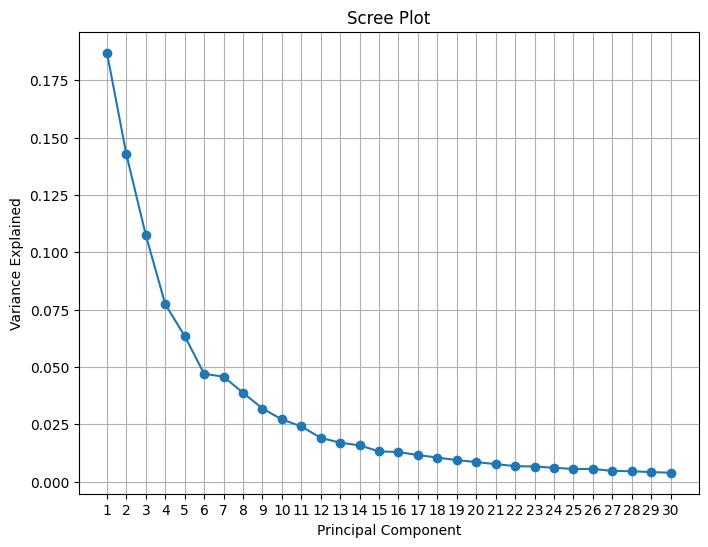

In [48]:
import matplotlib.pyplot as plt

# Variance explained by individual PCs
pca_score = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_score) + 1), pca_score, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(pca_score) + 1))
plt.grid(True)
plt.show()


In [49]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/home/ritesh/Desktop/MOLECULES/morgan/mordred_descriptors_updated_agonist.csv')

# Extract the SMILES column from the DataFrame
smiles_list = df['SMILES'].tolist()

# Print the list of SMILES
print(smiles_list)

['CCCCOC(=O)C(C)OC(=O)CCC', 'CCCCC(=O)O', 'CC(C)CCC(=O)O', 'C1C2CC(C1C=C2)C(=O)O', 'CCCC(C)C(=O)O', 'CCC(C)CC(=O)O', 'CCCCCCCC=CC(=O)O', 'CC(C)CC(=O)O', 'CCCCCCCCC(=O)O', 'CCCC(=O)O', 'CCC(C)C(=O)O', 'C1CC(C1)C(=O)O', 'C1=CC=C(C=C1)C=O', 'CC(C(C)O)O', 'C1=CC=C2C(=C1)C=CC(=O)O2', 'CCCCCCCC(=O)O', 'CCCCCCCC=O', 'C1=CC=C(C=C1)C(=O)C2=CC=CC=C2', 'COC1=C(C=C(C=C1)CC=C)OC', 'CC1=CC=C(C=C1)C(C)C', 'CCCCCCCC1CCC(=O)O1', 'CCCCCCCC(=O)OCC', 'C1CCNCC1', 'CCCCCCC(=O)O', 'CCCCCCC=CC(=O)O', 'CCCCCC(C)CCC(=O)O', 'CCCCCCN', 'CCCCCCO', 'CCCCCCCCS', 'CC(=O)OCC1=CC=CC=C1', 'CCCCCCOC(=O)C', 'CCCCCOC(=O)CC', 'C=CCOC(=O)CC1=CC=CC=C1', 'CCCCCC(=O)O', 'CCCCCCCCC=O', 'CCCCCC(=O)C=C', 'CC1=CCC(CC1=O)C(=C)C', 'CC(=CCCC(=CCO)C)C', 'CCCC=CC=O', 'COC1=CC=CC=C1O', 'CCC(=O)[O-]', 'CCCCCCCO', 'CCCCCCC=O', 'COC(=O)C1=CC=CC=C1O', 'CC1CCC(C(C1)O)C(C)C', 'CC1=C(C=C(C=C1)[N+](=O)[O-])[N+](=O)[O-]', 'CSSC', 'CSSCC1=CC=CO1', 'CCCCCO', 'CCC=O', 'C1=CN=CC=N1', 'CC(C)CCOC(=O)C', 'CCC(=O)O', 'CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34C

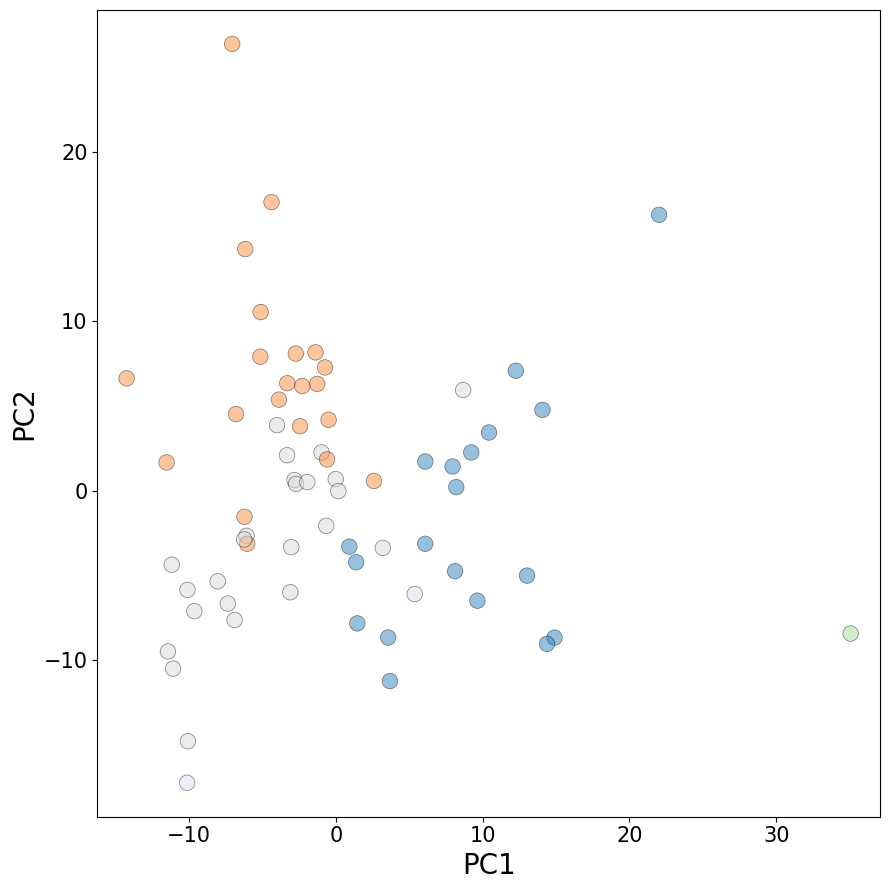

In [50]:
nclusters =  5    # choose number of clusters

####################################################################################

X_use = X_all_pca
X_main_ids = X_all_ids
X_kmeans = X_all_pca
kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_kmeans)
dists = []
for x in range(len(X_kmeans)):
    delta = [X_kmeans[x,i]-kmeans.cluster_centers_[kmeans.labels_[x],i] for i in range(len(X_kmeans[0]))]
    dist = np.linalg.norm(delta)
    dists.append(dist)
clusters = {}
clusterdists = {}
clustermins = []
clusterorders_dict = {}
clusterorders = np.zeros(X_kmeans.shape[0])
for x in range(nclusters):
    clusters[x] = [i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == x]
    clusterdists[x] = [dists[i] for i in clusters[x]]
    clustermins.append(clusters[x][clusterdists[x].index(min(clusterdists[x]))])
    clusterorders_dict[x] = [y for _,y in sorted(zip(clusterdists[x],clusters[x]))]
    for i in clusters[x]:
        clusterorders[i] = clusterorders_dict[x].index(i)+1
f_ind_1 = 0
f_ind_2 = 1
x_min, x_max = X_kmeans[:, f_ind_1].min() - 2, X_kmeans[:, f_ind_1].max() + 2
y_min, y_max = X_kmeans[:, f_ind_2].min() - 2, X_kmeans[:, f_ind_2].max() + 2
plt.figure(figsize=(9,9))
extent = [x_min,x_max,y_min,y_max]
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel(r"PC1",fontsize=20)
plt.ylabel(r"PC2",fontsize=20)
plt.locator_params(axis='y', nbins=8)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
mapping = kmeans.labels_
cMap = "tab20c"
plt.scatter(X_kmeans[:,f_ind_1], X_kmeans[:,f_ind_2],c=mapping,cmap=cMap,alpha=.5,marker=".",s=500,edgecolor="black",linewidth=0.5)
main_row_id = list(enumerate(X_main_ids))
clusters_with_ids = {}
for i in range(0,len(clusters)):
    emptylist = []
    for j in range(0,len(clusters[i])):
        emptylist.append(main_row_id[clusters[i][j]][1])
    clusters_with_ids[i] = emptylist
    
    
plt.tight_layout()
#plt.savefig("mordred_pca_plot.png",dpi=300)
plt.show()     


## Optimum No. of Clusters based on BIC, AIC, and Silhouette Score

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

nclusters = 5  # choose number of clusters

####################################################################################

X_use = X_all_pca
X_main_ids = X_all_ids
X_kmeans = X_all_pca

kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_kmeans)

dists = []
for x in range(len(X_kmeans)):
    delta = [X_kmeans[x,i]-kmeans.cluster_centers_[kmeans.labels_[x],i] for i in range(len(X_kmeans[0]))]
    dist = np.linalg.norm(delta)
    dists.append(dist)

clusters = {}
clusterdists = {}
clustermins=[]
clusterorders_dict={}
clusterorders=np.zeros(X_kmeans.shape[0])

for x in range(nclusters):
    clusters[x] =[i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == x]
    clusterdists[x]=[dists[i] for i in clusters[x]]
    clustermins.append(clusters[x][clusterdists[x].index(min(clusterdists[x]))])
    clusterorders_dict[x]=[y for _,y in sorted(zip(clusterdists[x],clusters[x]))]
    
for i in clusters:
     print("Cluster", i+1, ":", len(clusters[i]), "data points")

# Calculate BIC and AIC scores
from sklearn.cluster import KMeans

# ...

bic_scores=[]
aic_scores=[]

for k_value in range(2, nclusters + 1):
    kmeans_k = KMeans(n_clusters=k_value, random_state=42)
    kmeans_k.fit(X_kmeans)

    # BIC calculation
    bic_score = (-2 * kmeans_k.score(X_kmeans) + np.log(len(X_kmeans)) * k_value * np.log(len(X_kmeans)))

    # AIC calculation
    aic_score = (-2 * kmeans_k.score(X_kmeans) + 2 * len(kmeans_k.cluster_centers_) * X_kmeans.shape[1])

    bic_scores.append(bic_score)
    aic_scores.append(aic_score)

best_k_bic=np.argmin(bic_scores)+2 
best_k_aik =np.argmin(aic_scores)+2 

print("Best number of clusters based on BIC:", best_k_bic)
print("Best number of clusters based on AIC:", best_k_aik)

# Calculate Silhouette Score

labels=kmeans.labels_
silhouette_avg=silhouette_score(X_use, labels)
print("Silhouette Score for", nclusters, "clusters:", silhouette_avg)



Cluster 1 : 19 data points
Cluster 2 : 21 data points
Cluster 3 : 1 data points
Cluster 4 : 2 data points
Cluster 5 : 24 data points
Best number of clusters based on BIC: 5
Best number of clusters based on AIC: 5
Silhouette Score for 5 clusters: 0.11717554762724035


#### silhouette score is the lowest for k=5 clusters, while BIC and AIC score = k for K clusters, implying that increasing the number of clusters is not making a difference. Therefore, we compare the silhouette score.

# printing structures closest to the centroids


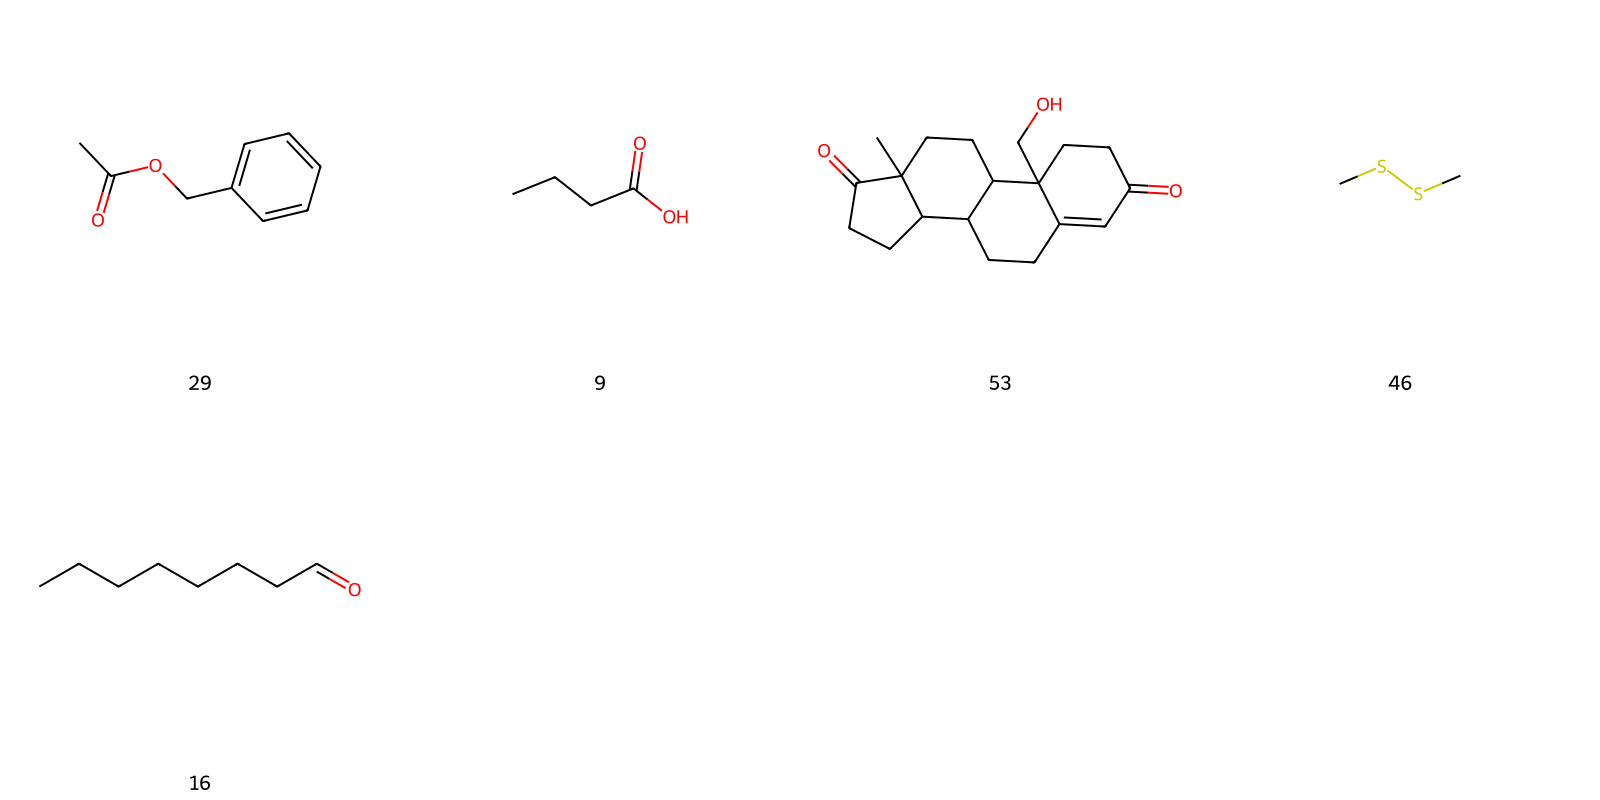

In [52]:
smiles = list(mols['SMILES'])

closest_to_centroids = []
for i in clustermins:
    closest_to_centroids.append(smiles[i])

count=0
subms = []
for i in closest_to_centroids:
    x = Chem.MolFromSmiles(i)
    count+=1
    subms.append(x)
clustermins_str = [str(i) for i in clustermins]
my_labels = clustermins_str  
molsPerRow = 4
subImgSize= (400,400)
nRows = -(count // -molsPerRow)
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
img = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1]) # setting up the image
img.drawOptions().legendFontSize=20
img.DrawMolecules(subms[:],legends=my_labels[:])
img.SetFontSize(40)
img.FinishDrawing()

with open('centroids.png','wb+') as wfp:      # opening a png file, goes into current folder
    wfp.write(img.GetDrawingText())           # saving in the image
Image.open('centroids.png')                   # opening it in the notebook

In [53]:
smiles = list(mols['SMILES'])

centroid_smiles = []
for i, centroid_index in enumerate(clustermins):
    centroid_smiles.append(smiles[centroid_index])
    print(f"Cluster {i+1} centroid SMILES: {smiles[centroid_index]}")


Cluster 1 centroid SMILES: CC(=O)OCC1=CC=CC=C1
Cluster 2 centroid SMILES: CCCC(=O)O
Cluster 3 centroid SMILES: CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34CO
Cluster 4 centroid SMILES: CSSC
Cluster 5 centroid SMILES: CCCCCCCC=O


In [54]:
import pubchempy as pcp


def find_similar_molecules(smiles, similarity=90, max_results=10):
    results = pcp.get_compounds(smiles, 'smiles', listkey_count=max_results, listkey_sim=similarity)
    similar_molecules = []
    for result in results:
        similar_molecules.append(result.canonical_smiles)
    return similar_molecules

centroid_smiles = ['CC(=O)OCC1=CC=CC=C1', 'CCCC(=O)O', 'CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34CO', 'CSSC', 'CCCCCCCC=O']

for smiles in centroid_smiles:
    similar_molecules = find_similar_molecules(smiles, similarity=90, max_results=10)
    print(f"Similar molecules for {smiles}:")
    for molecule in similar_molecules:
        print(molecule)
    print()


Similar molecules for CC(=O)OCC1=CC=CC=C1:
CC(=O)OCC1=CC=CC=C1

Similar molecules for CCCC(=O)O:
CCCC(=O)O

Similar molecules for CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34CO:
CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34CO

Similar molecules for CSSC:
CSSC

Similar molecules for CCCCCCCC=O:
CCCCCCCC=O



In [55]:
import csv
import pubchempy as pcp

def find_similar_molecules(smiles, similarity=90, max_results=30):
    results = pcp.get_compounds(smiles, 'smiles', searchtype='similarity', listkey_count=max_results)
    similar_molecules = []
    for result in results:
        similar_molecules.append(result.canonical_smiles)
    return similar_molecules

centroid_smiles = ['CC(=O)OCC1=CC=CC=C1', 'CCCC(=O)O', 'CC12CCC3C(C1CCC2=O)CCC4=CC(=O)CCC34CO', 'CSSC', 'CCCCCCCC=O']

with open('pubchemsimilarcentroid_agonist.csv', mode='w') as file:
    writer = csv.writer(file)

    smiles_list = []

    for smiles in centroid_smiles:
        similar_molecules = find_similar_molecules(smiles, similarity=90, max_results=30)
        
        smiles_list.extend(similar_molecules)

    writer.writerow(["SMILES"])
    
    # Write each smile on a new row
    for smile in smiles_list:
        writer.writerow([smile])

print("Similar molecules saved to CSV file.")

Similar molecules saved to CSV file.


In [56]:
import csv
file1 = "/home/ritesh/Desktop/MOLECULES/morgan/pubchemsimilarcentroid_agonist.csv.csv"
file2 = "/home/ritesh/Desktop/MOLECULES/morgan/or_agonist_update_2.csv"


In [57]:
import pandas as pd

def merge_csv_files(file1, file2, output_file):
    # Load CSV files into pandas DataFrames
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Concatenate the DataFrames
    merged_df = pd.concat([df1, df2], ignore_index=True)

    # Drop duplicates based on the "SMILES" column
    merged_df.drop_duplicates(subset="SMILES", inplace=True)
    
    # Save merged DataFrame to a new CSV file
    merged_df.to_csv(output_file, index=False)

    print("CSV files merged successfully!")

# Usage example
file1 = "/home/ritesh/Desktop/MOLECULES/morgan/pubchemsimilarcentroid_agonist.csv"
file2 = "/home/ritesh/Desktop/MOLECULES/morgan/or_agonist_update_2.csv"
output_file = 'final_descriptor_smiles_agonist.csv'

merge_csv_files(file1, file2, output_file)


CSV files merged successfully!


## spider plot to visualize the descriptors and smiles

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D

In [59]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Descriptors3D
import matplotlib.pyplot as plt

# Step 1: Read the data from the CSV file
file2 = "/home/ritesh/Desktop/MOLECULES/morgan/final_descriptor_smiles_agonist.csv"
data = pd.read_csv(file2)


[18:29:05] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[18:29:05] UFFTYPER: Unrecognized charge state for atom: 0


ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

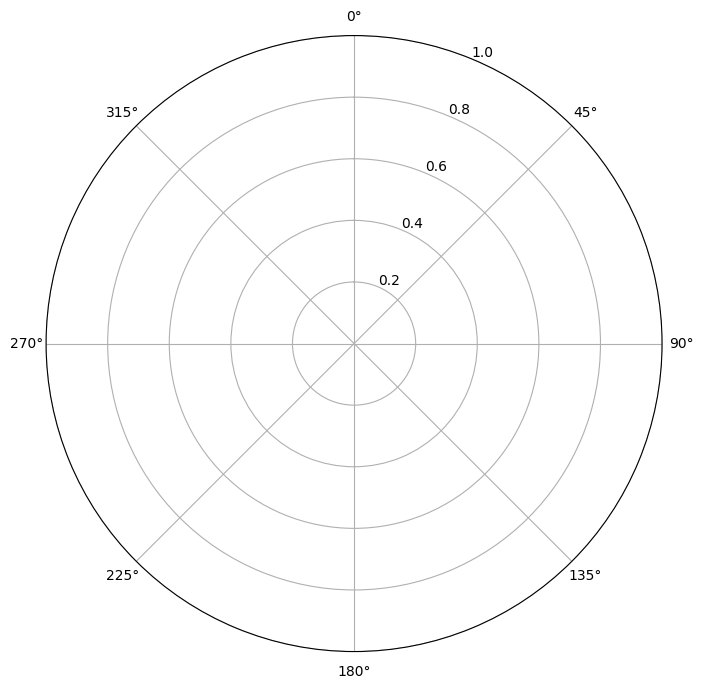

In [60]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Descriptors3D
import matplotlib.pyplot as plt

# Step 1: Read the data from the CSV file
file2 = "/home/ritesh/Desktop/MOLECULES/morgan/final_descriptor_smiles_agonist.csv"
data = pd.read_csv(file2)


# Extract SMILES from the data
smiles = data['SMILES']

# Select a subset of SMILES (e.g., 20 random samples)
subset_size = 20
subset_smiles = smiles.sample(n=subset_size, random_state=42).tolist()

# Initialize lists to store descriptor values
mol_descriptors = []
radius_of_gyration = []
asphericity = []
logp_values = []

# Calculate descriptors for each molecule in the subset using RDKit functions.
for smiles_str in subset_smiles:
    mol = Chem.MolFromSmiles(smiles_str)
    if mol is not None:
        try:
            mol_with_hydrogens = Chem.AddHs(mol)  # Add hydrogens to the molecule
            AllChem.EmbedMolecule(mol_with_hydrogens, AllChem.ETKDG())  # Generate a 3D conformation

            descriptor_values = [
                Descriptors.MolWt(mol),
                Descriptors.TPSA(mol),
                Descriptors.NumHAcceptors(mol),
                Descriptors.NumHDonors(mol),
                Descriptors.NumRotatableBonds(mol)
            ]
            mol_descriptors.append(descriptor_values)

            radius_of_gyration.append(Descriptors3D.RadiusOfGyration(mol_with_hydrogens))
            asphericity.append(Descriptors3D.Asphericity(mol_with_hydrogens))

            logp_values.append(Descriptors.MolLogP(mol))
        except Exception as e:
            print(f"Warning: {str(e)} - Skipping molecule: {smiles_str}")
            continue
    else:
        print(f"Warning: Invalid SMILES - Skipping molecule: {smiles_str}")
        continue

# Convert the descriptor values to a DataFrame
descriptor_columns = ['MolWt', 'TPSA', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds']
descriptors_df = pd.DataFrame(mol_descriptors, columns=descriptor_columns)

# Add previously computed descriptors to the DataFrame
descriptors_df['RadiusOfGyration'] = radius_of_gyration
descriptors_df['Asphericity'] = asphericity
descriptors_df['LogP'] = logp_values

# Step 2: Plot the spider plot for the subset
categories = descriptor_columns + ['RadiusOfGyration', 'Asphericity', 'LogP']
values = descriptors_df.mean().values.tolist()

# Check if the number of categories and values match
if len(categories) != len(values):
    raise ValueError("Number of categories and values do not match.")

# Calculate angles for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

# Plot the radar chart (spider plot)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw radar plot
ax.plot(angles, values + [values[0]], linewidth=2, linestyle='solid', color='blue', marker='o', markersize=8,
        markerfacecolor='blue', alpha=0.7)

# Fill enclosed area with color
ax.fill(angles, values + [values[0]], alpha=0.2, color='blue')

# Set labels for each category on the x-axis
ax.set_xticks(angles)
ax.set_xticklabels(categories, fontsize=12)

# Set axis limits and labels
ax.set_ylim(0, max(values) + 1)
ax.set_yticks(np.arange(0, max(values) + 2))

# Add angles and descriptors as text labels
for angle, label in zip(angles, categories):
    x = np.cos(angle)
    y = np.sin(angle)
    ax.text(angle, max(values) + 0.5, label, ha='center', va='center', fontsize=12, rotation_mode='anchor',
            rotation=np.degrees(angle))

# Add title to the plot
plt.title('Radar Chart (Spider Plot) of RDKit Descriptors (Subset)', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (4).

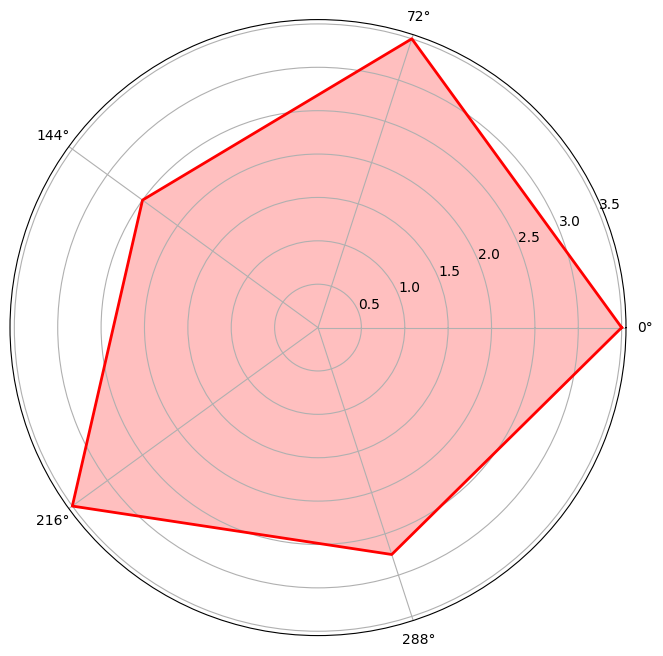

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample dataset (replace this with your own data)
data = {
    'Category': ['Category 1', 'Category 2', 'Category 3', 'Category 4'],
    'Variable1': [3, 4, 2, 5],
    'Variable2': [2, 5, 4, 3],
    'Variable3': [4, 3, 1, 2],
    'Variable4': [5, 2, 3, 4],
    'Variable5': [1, 4, 5, 1]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Number of variables to plot
num_variables = 5

# List of categories
categories = df['Category'].values.tolist()

# Calculate mean values for each variable
mean_values = df.iloc[:, 1:].mean().values.tolist()

# Close the plot by repeating the first value
mean_values += mean_values[:1]

# Calculate angles for each variable
angles = np.linspace(0, 2 * np.pi, num_variables, endpoint=False).tolist()
angles += angles[:1]

# Plot the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot the values as a line plot and fill the enclosed area with color
plt.plot(angles, mean_values, color='red', linewidth=2)
plt.fill(angles, mean_values, alpha=0.25, color='red')

# Set labels for each category on the x-axis
plt.xticks(angles[:-1], categories)

# Set axis limits and labels
plt.ylim(0, max(mean_values) + 1)
plt.yticks(np.arange(0, max(mean_values) + 2))
ax.set_rlabel_position(0)

# Add title to the plot
plt.title('Spider Plot of Mean Values')

# Display the plot
plt.show()


In [1]:
from rdkit.Chem import Descriptors

# Step 1: Read the data from the CSV file
data = pd.read_csv(file5)

# Extract SMILES from the data
smiles = data['SMILES']
radius_of_gyration = []
asphericity = []
# For each molecule in the DataFrame
for index, row in df.iterrows():
    smiles = row['SMILES']  # Getting the SMILES string from the "SMILES" column for the current row


    # Create a molecule from the SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate a 3D conformation using the ETKDG method
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())

    # Compute the descriptors
    radius_of_gyration.append(Descriptors3D.RadiusOfGyration(molecule))
    asphericity.append(Descriptors3D.Asphericity(molecule))
# Step 2: Calculate the RDKit descriptors
descriptors = []
for sm in smiles:
    mol = Chem.MolFromSmiles(sm)
    if mol is not None:
        descriptor_values = [
            Descriptors.MolWt(mol),
            Descriptors.MolLogP(mol),
            Descriptors.NumHDonors(mol),
            Descriptors.NumHAcceptors(mol),
            Descriptors.NumRotatableBonds(mol),
            Descriptors.TPSA(mol),
        ]
        descriptors.append(descriptor_values)
    else:
        descriptors.append([np.nan] * 5)  # Placeholder for invalid SMILES

# Convert the descriptors to a DataFrame
descriptors_df = pd.DataFrame(descriptors, columns=['MolWt', 'TPSA', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds'])
descriptors_df['RadiusOfGyration'] = radius_of_gyration
descriptors_df['Asphericity'] = asphericity
# Step 3: Plot the spider plot
categories = descriptors_df.columns.tolist()
values = descriptors_df.mean().values.tolist()

# Calculate angles for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Repeat the first angle to close the plot

# Plot the spider plot
plt.figure(figsize=(8, 8))  # Optional: adjust the figure size
ax = plt.subplot(111, polar=True)  # Create a polar axis

# Plot the values as a line plot
plt.plot(angles, values + [values[0]], color='red', linewidth=2)  # Add the first value at the end to close the plot

# Fill the area enclosed by the line plot
plt.fill(angles, values + [values[0]], alpha=0.25, color='red')  # Add the first value at the end to close the plot

# Set the labels for each category
plt.xticks(angles[:-1], categories)

# Set the axis limits and labels
plt.ylim(0, max(values) + 1)  # Optional: adjust the y-axis limits
plt.yticks(np.arange(0, max(values) + 2))  # Optional: customize the y-axis tick values
ax.set_rlabel_position(0)  # Set the position of the radial labels

# Add a title to the plot
plt.title('Spider Plot of RDKit Descriptors')

# Display the plot
plt.show()


NameError: name 'pd' is not defined